# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
!conda install -c conda-forge fbprophet -y

/bin/bash: conda: command not found


In [4]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [5]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [6]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [7]:
df= pd.read_csv("AMZN.csv")

In [8]:
#read_csv function from pandas

In [9]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-28,164.975006,169.037506,164.899994,168.990494,168.990494,59854000
1,2022-03-29,170.384003,170.831497,167.868500,169.315002,169.315002,66154000
2,2022-03-30,168.509506,168.950500,165.500000,166.300995,166.300995,56168000
3,2022-03-31,166.445007,166.494995,162.953506,162.997498,162.997498,59966000
4,2022-04-01,164.149506,165.826996,162.319504,163.559998,163.559998,57090000
...,...,...,...,...,...,...,...
245,2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900
246,2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300
247,2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400
248,2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,112.987198,114.931394,110.892868,112.910988,112.910988,7.394766e+07
std,20.484167,20.616928,20.192425,20.332852,20.332852,3.044218e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,95.992498,97.447498,94.157501,96.229998,96.229998,5.504142e+07
50%,110.319999,113.335003,107.516751,110.515000,110.515000,6.626465e+07
75%,123.537498,125.419750,121.230001,124.445375,124.445375,8.412122e+07
max,170.384003,170.831497,167.868500,169.315002,169.315002,2.726620e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [12]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [13]:
px.area(df,x="Date", y="Close")

In [14]:
px.line(df, x="Date", y="Close")

In [15]:
px.area(df, x="Date", y="Volume")

In [16]:
px.bar(df,y="Volume",)

In [17]:
px.box(df,y="Close")

# Understanding Facebook Prophet

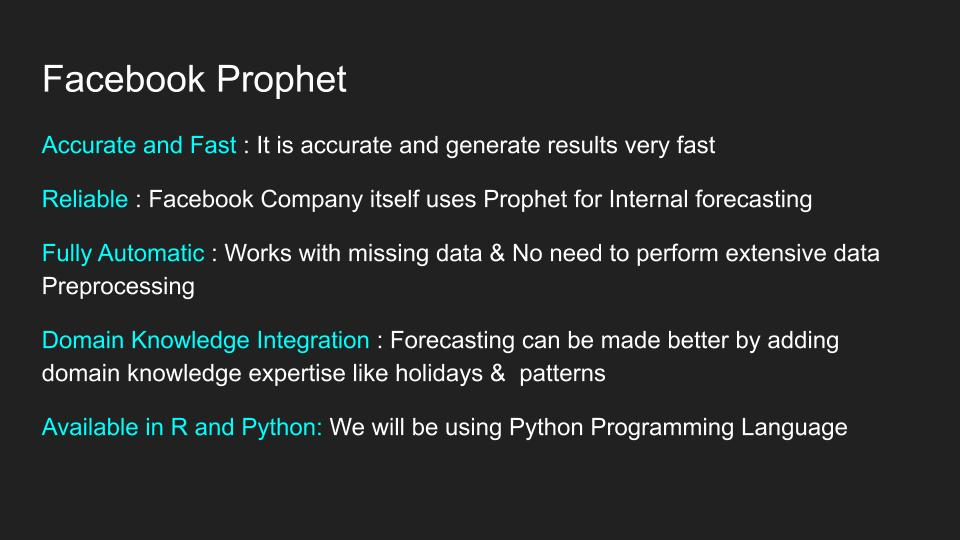

## Data Preperation

In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-28,164.975006,169.037506,164.899994,168.990494,168.990494,59854000
1,2022-03-29,170.384003,170.831497,167.868500,169.315002,169.315002,66154000
2,2022-03-30,168.509506,168.950500,165.500000,166.300995,166.300995,56168000
3,2022-03-31,166.445007,166.494995,162.953506,162.997498,162.997498,59966000
4,2022-04-01,164.149506,165.826996,162.319504,163.559998,163.559998,57090000
...,...,...,...,...,...,...,...
245,2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900
246,2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300
247,2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400
248,2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300


In [19]:
columns = ['Date',"Close"]
ndf = pd.DataFrame(df, columns=columns)

In [20]:
ndf

,Date,Close
0,2022-03-28,168.990494
1,2022-03-29,169.315002
2,2022-03-30,166.300995
3,2022-03-31,162.997498
4,2022-04-01,163.559998
...,...,...
245,2023-03-20,97.709999
246,2023-03-21,100.610001
247,2023-03-22,98.699997
248,2023-03-23,98.709999


In [21]:
prophet_df= ndf.rename(columns={'Date':'ds','Close':'y'})

In [22]:
prophet_df

,ds,y
0,2022-03-28,168.990494
1,2022-03-29,169.315002
2,2022-03-30,166.300995
3,2022-03-31,162.997498
4,2022-04-01,163.559998
...,...,...
245,2023-03-20,97.709999
246,2023-03-21,100.610001
247,2023-03-22,98.699997
248,2023-03-23,98.709999


## Creating Facebook Prophet Model

In [23]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9sfffot/ts8g2oq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9sfffot/jz6zdd6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57850', 'data', 'file=/tmp/tmph9sfffot/ts8g2oq2.json', 'init=/tmp/tmph9sfffot/jz6zdd6r.json', 'output', 'file=/tmp/tmph9sfffot/prophet_modelynnmgg57/prophet_model-20230327012119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [24]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-28,167.837898,160.801489,176.837621,167.837898,167.837898,0.379908,0.379908,0.379908,0.379908,0.379908,0.379908,0.0,0.0,0.0,168.217806
1,2022-03-29,166.742388,158.284889,175.655133,166.742388,166.742388,-0.144008,-0.144008,-0.144008,-0.144008,-0.144008,-0.144008,0.0,0.0,0.0,166.598380
2,2022-03-30,165.646877,157.633315,174.169170,165.646877,165.646877,0.200569,0.200569,0.200569,0.200569,0.200569,0.200569,0.0,0.0,0.0,165.847447
3,2022-03-31,164.551367,156.626675,173.339982,164.551367,164.551367,0.226825,0.226825,0.226825,0.226825,0.226825,0.226825,0.0,0.0,0.0,164.778192
4,2022-04-01,163.455857,155.066985,171.508054,163.455857,163.455857,-0.326366,-0.326366,-0.326366,-0.326366,-0.326366,-0.326366,0.0,0.0,0.0,163.129491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-04-19,100.800483,91.945426,110.131684,97.217367,103.506315,0.200569,0.200569,0.200569,0.200569,0.200569,0.200569,0.0,0.0,0.0,101.001052
276,2023-04-20,100.887000,92.606229,110.145953,97.056948,103.894381,0.226825,0.226825,0.226825,0.226825,0.226825,0.226825,0.0,0.0,0.0,101.113825
277,2023-04-21,100.973518,91.378934,109.873531,96.817470,104.241624,-0.326366,-0.326366,-0.326366,-0.326366,-0.326366,-0.326366,0.0,0.0,0.0,100.647152
278,2023-04-22,101.060035,91.472795,109.686940,96.616527,104.574001,-0.168464,-0.168464,-0.168464,-0.168464,-0.168464,-0.168464,0.0,0.0,0.0,100.891571


In [26]:
px.line(forecast, x='ds', y ='yhat')

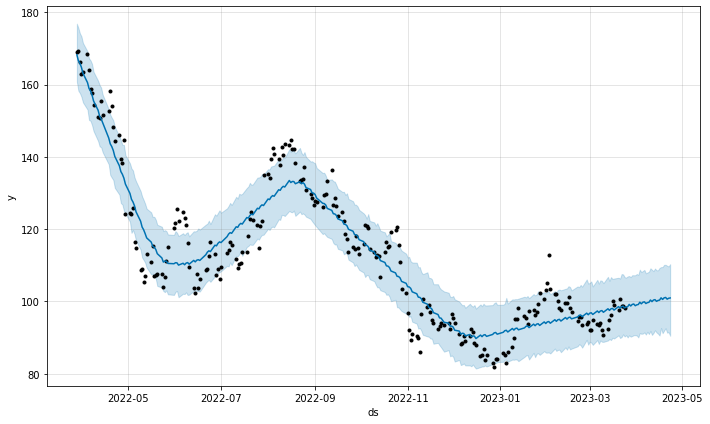

In [27]:
figure= m.plot(forecast,xlabel='ds', ylabel="y")

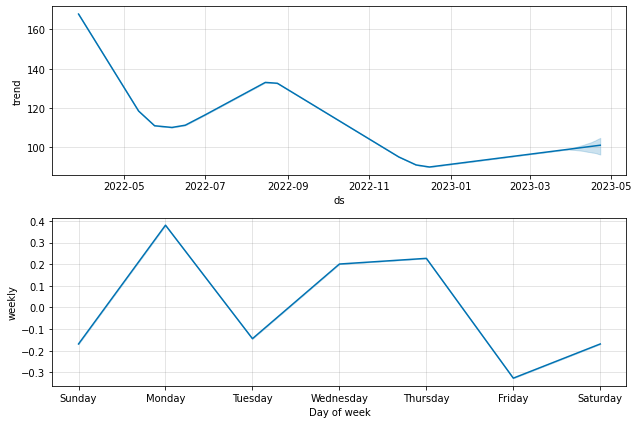

In [28]:
figure=m.plot_components(forecast)

##Downloading the Forecast data

In [29]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>